<a href="https://colab.research.google.com/github/ARCHI8699/Medical_Image_Analysis/blob/master/Glaucoma_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
train_gl_dir = '/content/drive/My Drive/Colab Notebooks/Glaucoma_detection_dataset/Train/Glaucoma'
train_ngl_dir = '/content/drive/My Drive/Colab Notebooks/Glaucoma_detection_dataset/Train/Non-glaucoma'
test_gl_dir = '/content/drive/My Drive/Colab Notebooks/Glaucoma_detection_dataset/Test/Glaucoma'
test_ngl_dir = '/content/drive/My Drive/Colab Notebooks/Glaucoma_detection_dataset/Test/Non-glaucoma'

In [ ]:
import os

In [ ]:
train_gl_names = os.listdir(train_gl_dir)
print(train_gl_names[:10])

train_ngl_names = os.listdir(train_ngl_dir)
print(train_ngl_names[:10])

['image102prime.tif', 'image101prime.tif', 'image100prime.tif', 'image103prime.tif', 'image105prime.tif', 'image104prime.tif', 'image106prime.tif', 'image108prime.tif', 'image10prime.jpg', 'image107prime.tif']
['401fdfd0db07.png', '404ede327e98.png', '4029d70e9d8a.png', '40c24aded50c.png', '40dd4e6e4444.png', '4158c340fa49.png', '4242c0d87f57.png', '4276b82e4489.png', '4189d4e631ec.png', '419406328dcd.png']


In [ ]:
print('total training glaucoma images:', len(os.listdir(train_gl_dir)))
print('total training non-glaucoma images:', len(os.listdir(train_ngl_dir)))

total training glaucoma images: 400
total training non-glaucoma images: 400


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

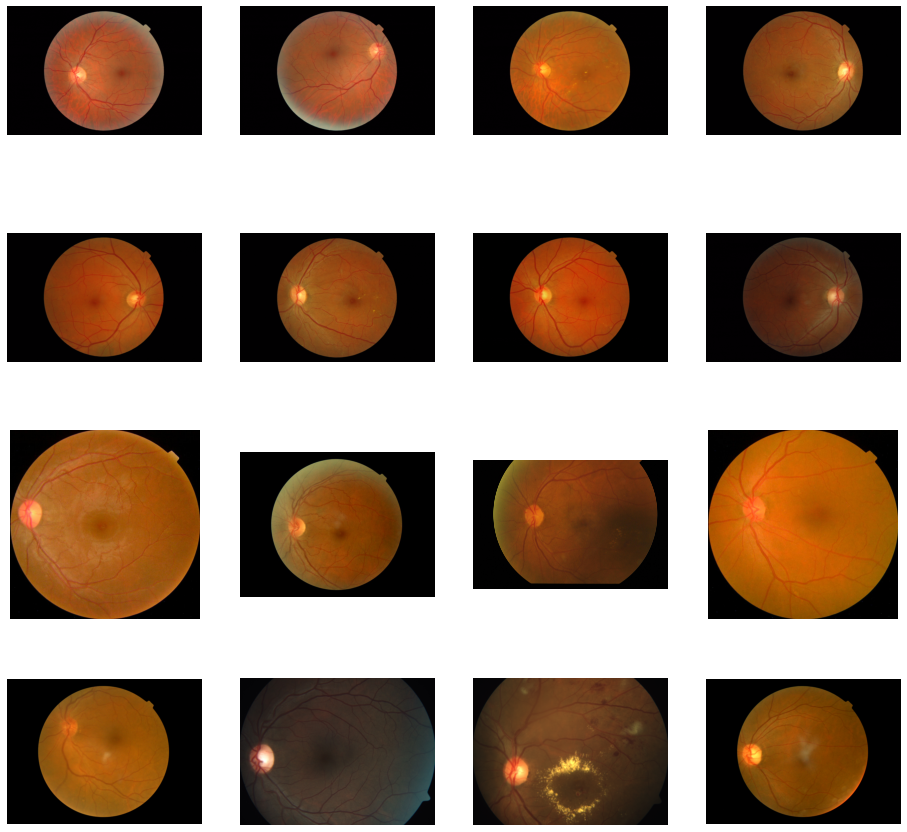

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_gl_pix = [os.path.join(train_gl_dir, fname) 
                for fname in train_gl_names[pic_index-8:pic_index]]
next_ngl_pix = [os.path.join(train_ngl_dir, fname) 
                for fname in train_ngl_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_gl_pix+next_ngl_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', 
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Colab Notebooks/Glaucoma_detection_dataset/Train/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/My Drive/Colab Notebooks/Glaucoma_detection_dataset/Test/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 800 images belonging to 2 classes.
Found 222 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=800// 128,
                              epochs=4,
                               #64,
                              validation_data=validation_generator,
                              validation_steps=222 // 128,
                              verbose=1)

Epoch 1/4
6/6 [==============================] - 101s 17s/step - loss: 0.0250 - accuracy: 0.9955 - val_loss: 0.1154 - val_accuracy: 0.9688
Epoch 2/4
6/6 [==============================] - 105s 18s/step - loss: 0.1134 - accuracy: 0.9635 - val_loss: 0.0740 - val_accuracy: 0.9688
Epoch 3/4
6/6 [==============================] - 105s 17s/step - loss: 0.0119 - accuracy: 0.9987 - val_loss: 0.0609 - val_accuracy: 0.9688
Epoch 4/4
6/6 [==============================] - 98s 16s/step - loss: 0.0056 - accuracy: 0.9985 - val_loss: 0.0011 - val_accuracy: 1.0000


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/drive/My Drive/Colab Notebooks/predict_glaucoma/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is not Glaucoma Affected. Healthy!")
  else:
    print(fn + " is Glaucoma Affected.)")

Saving image380prime.tif to image380prime (1).tif
[0.00097816]
image380prime.tif is Glaucoma Affected.)
